In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statistics as st

Загружаем данные 

In [2]:
lobs_1 = pd.read_csv('/content/drive/MyDrive/CMF/Projects/HFT /Homework_1/md/btcusdt:Binance:LinearPerpetual/lobs.csv')
trades_1 =  pd.read_csv('/content/drive/MyDrive/CMF/Projects/HFT /Homework_1/md/btcusdt:Binance:LinearPerpetual/trades.csv')
lobs_2 = pd.read_csv('/content/drive/MyDrive/CMF/Projects/HFT /Homework_1/md/ethusdt:Binance:LinearPerpetual/lobs.csv')
trades_2 = pd.read_csv('/content/drive/MyDrive/CMF/Projects/HFT /Homework_1/md/ethusdt:Binance:LinearPerpetual/trades.csv')

In [3]:
lobs_1 = lobs_1.rename({' exchange_ts' : 'exchange_ts'}, axis='columns')
lobs_2 = lobs_2.rename({' exchange_ts' : 'exchange_ts'}, axis='columns')

Нарисуем графики поведения best-уровней стаканов, вместе с ценой price. 
Чтобы было лучше видно, нарисуем график за последние 100 милисекунд

In [5]:
#Смержим данные, чтобы не было лога 
merged_1 = trades_1.merge(lobs_1 , on = 'exchange_ts')
merged_2 = trades_2.merge(lobs_2 , on = 'exchange_ts')

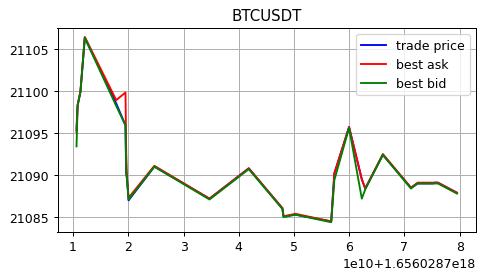

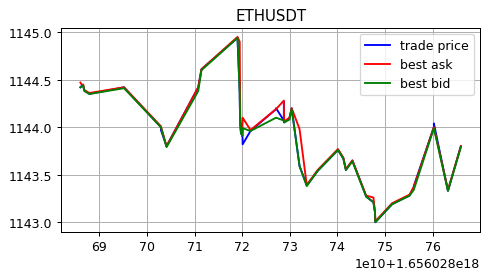

In [26]:
plt.figure(dpi = 90, figsize = (6, 3))
plt.title('BTCUSDT')
plt.plot(merged_1['exchange_ts'][-100:-1], merged_1['price'][-100:-1], color = 'blue')
plt.plot(merged_1['exchange_ts'][-100:-1], merged_1['btcusdt:Binance:LinearPerpetual_ask_price_0'][-100:-1], color = 'red')
plt.plot(merged_1['exchange_ts'][-100:-1], merged_1['btcusdt:Binance:LinearPerpetual_bid_price_0'][-100:-1], color = 'green')
plt.legend(['trade price', 'best ask', 'best bid'])
plt.grid(True)
plt.show()

plt.figure(dpi = 90, figsize = (6, 3))
plt.title('ETHUSDT')
plt.plot(merged_2['exchange_ts'][-100:-1], merged_2['price'][-100:-1], color = 'blue')
plt.plot(merged_2['exchange_ts'][-100:-1], merged_2['ethusdt:Binance:LinearPerpetual_ask_price_0'][-100:-1], color = 'red')
plt.plot(merged_2['exchange_ts'][-100:-1], merged_2['ethusdt:Binance:LinearPerpetual_bid_price_0'][-100:-1], color = 'green')
plt.legend(['trade price', 'best ask', 'best bid'])
plt.grid(True)
plt.show()

 Посчитаем статитистики величины размера трейда


In [9]:
print('1. BTCUSDT')
print(' -0.05 квантиль:', np.quantile(trades_1['size'], 0.05))
print(' -0.95 квантиль:', np.quantile(trades_1['size'], 0.95))
print(' -Медиана:', np.median(trades_1['size']))
print(' -Среднее:', np.mean(trades_1['size']))
print(' -Дисперсия:', np.std(trades_1['size'])*np.std(trades_1['size']))
print('2. ETHUSDT')
print(' -0.05 квантиль:', np.quantile(trades_2['size'], 0.05))
print(' -0.95 квантиль:', np.quantile(trades_2['size'], 0.95))
print(' -Медиана:', np.median(trades_2['size']))
print(' -Среднее:', np.mean(trades_2['size']))
print(' -Дисперсия:', np.std(trades_2['size'])*np.std(trades_2['size']))

1. BTCUSDT
 -0.05 квантиль: 0.001
 -0.95 квантиль: 0.519
 -Медиана: 0.017
 -Среднее: 0.12200803165102181
 -Дисперсия: 0.3132316967452496
2. ETHUSDT
 -0.05 квантиль: 0.005
 -0.95 квантиль: 5.0
 -Медиана: 0.153
 -Среднее: 1.2198729337234182
 -Дисперсия: 40.11739207893067


Нарисуем гистограммы. Для более наглядной картинки обрежем параметр range






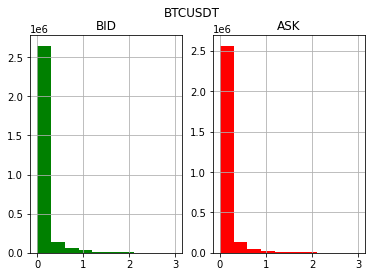

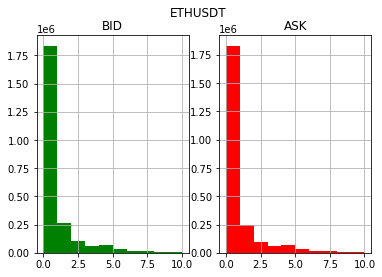

In [19]:
#Trades BTC
fig, axs = plt.subplots(1, 2)
fig.suptitle("BTCUSDT")
axs[0].hist( trades_1[trades_1['aggro_side'] == 'BID']['size'], range = ( 0, 3), color = 'green' )
axs[0].set_title('BID')
axs[0].grid(True)
axs[1].hist( trades_1[trades_1['aggro_side'] == 'ASK']['size'], range = ( 0, 3), color = 'red')
axs[1].set_title('ASK')
axs[1].grid(True)
plt.show()

fig, axs = plt.subplots(1, 2)
fig.suptitle("ETHUSDT")
axs[0].hist( trades_2[trades_2['aggro_side'] == 'BID']['size'], range = ( 0, 10), color = 'green' )
axs[0].set_title('BID')
axs[0].grid(True)
axs[1].hist( trades_2[trades_2['aggro_side'] == 'ASK']['size'], range = ( 0, 10), color = 'red')
axs[1].set_title('ASK')
axs[1].grid(True)
plt.show()

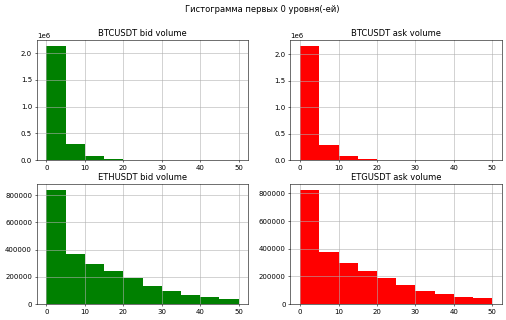

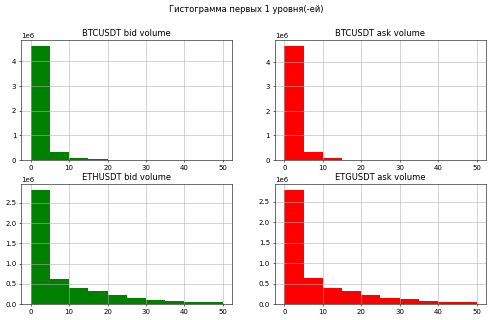

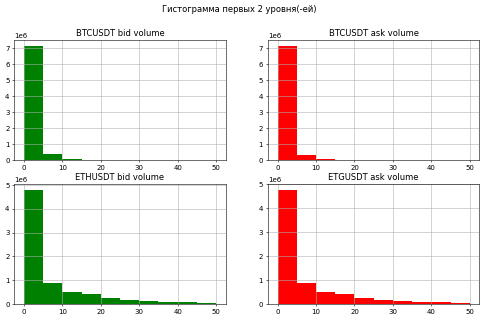

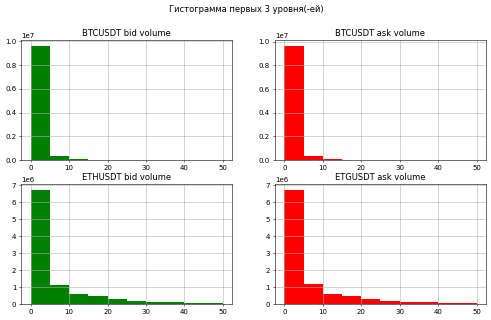

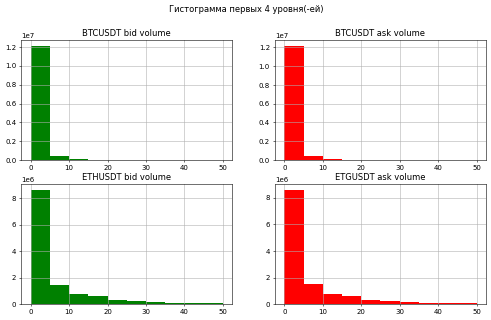

In [12]:
#Volumes
length_1 = len(lobs_1)
length_2 = len(lobs_2)
for i in range(5):
  bid_vol_1 = np.zeros(length_1)
  ask_vol_1 = np.zeros(length_1)
  bid_vol_2 = np.zeros(length_2)
  ask_vol_2 = np.zeros(length_2)  
  for j in range(i+1):
    if (j == 0):
      bid_vol_1 += lobs_1['btcusdt:Binance:LinearPerpetual_bid_vol_' + str(j)]
      ask_vol_1 += lobs_1['btcusdt:Binance:LinearPerpetual_ask_vol_' + str(j)]
      bid_vol_2 += lobs_2['ethusdt:Binance:LinearPerpetual_bid_vol_' + str(j)]
      ask_vol_2 += lobs_2['ethusdt:Binance:LinearPerpetual_ask_vol_' + str(j)]
    else:
      bid_vol_1 = np.concatenate( [bid_vol_1, lobs_1['btcusdt:Binance:LinearPerpetual_bid_vol_' + str(j)]])
      ask_vol_1 = np.concatenate( [ask_vol_1, lobs_1['btcusdt:Binance:LinearPerpetual_ask_vol_' + str(j)]])
      bid_vol_2 = np.concatenate( [bid_vol_2, lobs_2['ethusdt:Binance:LinearPerpetual_bid_vol_' + str(j)]])
      ask_vol_2 = np.concatenate( [ask_vol_2, lobs_2['ethusdt:Binance:LinearPerpetual_ask_vol_' + str(j)]])
  
  fig, axs = plt.subplots(2, 2, dpi = 50, figsize = (12, 7))
  fig.suptitle('Гистограмма первых '+str(i)+' уровня(-ей)')
  axs[0, 0].grid(True)
  axs[0, 0].hist(bid_vol_1, color = 'green', range = ( 0, 50) )
  axs[0, 0].set_title('BTCUSDT bid volume')
  axs[0, 1].grid(True)
  axs[0, 1].hist(ask_vol_1, color = 'red', range = ( 0, 50) )
  axs[0, 1].set_title('BTCUSDT ask volume')
  axs[1, 0].grid(True)
  axs[1, 0].hist(bid_vol_2, color = 'green', range = ( 0, 50) )
  axs[1, 0].set_title('ETHUSDT bid volume')
  axs[1, 1].grid(True)
  axs[1, 1].hist(ask_vol_2, color = 'red',  range = ( 0, 50) )
  axs[1, 1].set_title('ETGUSDT ask volume')
  plt.show()

Построим график зависимости изменения best_price от размера трейда

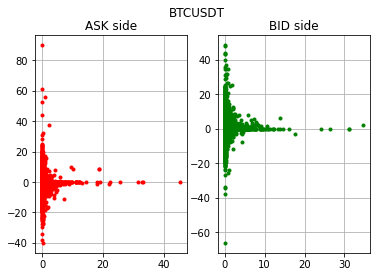

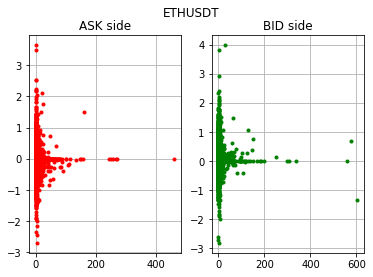

In [14]:
#BTCUSDT
merged_1['delta_best_price_ask'] = np.concatenate([[0], np.diff(merged_1['btcusdt:Binance:LinearPerpetual_ask_price_0'])])
merged_1['delta_best_price_bid'] = np.concatenate([[0], np.diff(merged_1['btcusdt:Binance:LinearPerpetual_bid_price_0'])])
merged_1_ASK = merged_1[merged_1['aggro_side'] == 'ASK'] 
merged_1_BID = merged_1[merged_1['aggro_side'] == 'BID'] 
fig, axs = plt.subplots(1, 2)
fig.suptitle('BTCUSDT')
axs[0].plot(merged_1_ASK['size'], merged_1_ASK['delta_best_price_ask'], '.', color = 'red')
axs[0].set_title('ASK side')
axs[0].grid(True)
axs[1].plot(merged_1_BID['size'], merged_1_BID['delta_best_price_bid'], '.',  color = 'green')
axs[1].set_title('BID side')
axs[1].grid(True)
plt.show()
#ETHUSDT
merged_2['delta_best_price_ask'] = np.concatenate([[0], np.diff(merged_2['ethusdt:Binance:LinearPerpetual_ask_price_0'])])
merged_2['delta_best_price_bid'] = np.concatenate([[0], np.diff(merged_2['ethusdt:Binance:LinearPerpetual_bid_price_0'])])
merged_2_ASK = merged_2[merged_2['aggro_side'] == 'ASK'] 
merged_2_BID = merged_2[merged_2['aggro_side'] == 'BID'] 
fig, axs = plt.subplots(1, 2)
fig.suptitle('ETHUSDT')
axs[0].plot(merged_2_ASK['size'], merged_2_ASK['delta_best_price_ask'], '.',  color = 'red')
axs[0].set_title('ASK side')
axs[0].grid(True)
axs[1].plot(merged_2_BID['size'], merged_2_BID['delta_best_price_bid'], '.',  color = 'green')
axs[1].set_title('BID side')
axs[1].grid(True)
plt.show()

Посмотрим на корреляционную зависимость между мид прайсами

In [23]:
merged = merged_1.merge(merged_2, on =  'exchange_ts')
np.corrcoef( (merged['btcusdt:Binance:LinearPerpetual_ask_price_0'] + merged['btcusdt:Binance:LinearPerpetual_bid_price_0'])/2, 
             (merged['ethusdt:Binance:LinearPerpetual_ask_price_0'] + merged['ethusdt:Binance:LinearPerpetual_bid_price_0'])/2 )

array([[1.        , 0.93874026],
       [0.93874026, 1.        ]])

Корреляция немалая. Посмотрим на объемы торгов. Можно заметить, что у ETH есть небольшое отставание в объеме сделок, но оно незакономерно

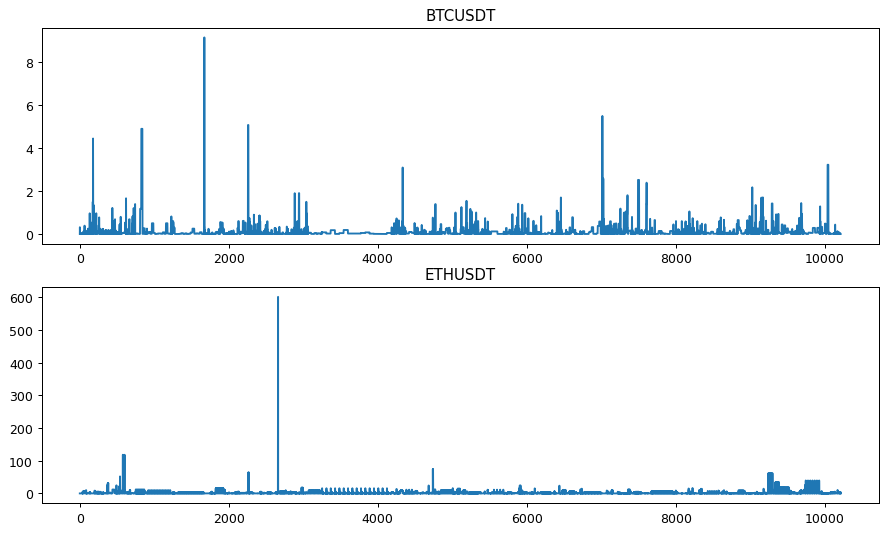

In [34]:
fig, axs = plt.subplots(2, 1, figsize = (12, 7), dpi = 90)
axs[0].set_title('BTCUSDT')
axs[0].plot(merged['size_x'])
axs[1].set_title('ETHUSDT')
axs[1].plot(merged['size_y'])
plt.show()